# I.3 Probabilidad condicionada. Independencia de sucesos. Verosimilitud

## Probabilidad condicionada 

Consideremos que tenemos un espacio de probabilidad $(\Omega, \mathscr{F}, P)$. Recordemos que un **suceso** $A \in \mathscr{F}$, $A \subset \Omega$ es un subconjunto formado por algunos resultados posibles del espacio muestral. También que el suceso acontece si lo hace cualquiera de los resultados que lo componen.

Supongamos ahora que sabemos que acontece otro suceso $B$ del espacio de probabilidad. ¿Podemos utilizar este conocimiento para mejorar nuestro conocimineto de $A$? Por ejemplo, si se lanza un dado bueno sabemos que las probabilidades de todas sus caras son idénticas e iguales a $\frac{1}{6}$. Si nos dicen que el resultado que ha salido es par, esto es el suceso $\{par\}$, ello nos permite saber que las probabilidades de todos los resultados impares es nula, y que el de los pares pasa a ser de $\frac{1}{3}$ cada una.

Consideremos que estamos interesados en el suceso $A$, que tiene una probabilidad $P(A)$. Supongamos que observamos un suceso relacionado $B$. ¿Aumenta de algún modo la certidumbre que tenemos en relación al suceso $A$ por haber acontecido otro relacionado $B$?

Definimos la **probabilidad del suceso $A$ condicionada por el suceso $B$** como

$$P(A/B) = \frac{P(A\cap B)}{P(B)}$$

Como sabemos que $B$, el **suceso condicionante**, acontece, podemos interpretarlo como el espacio muestral en un nuevo espacio de probabilidad con una nueva asignación de probabilidades $P(\bullet/B)$. Adviértase que:
* $B$ se convierte en el suceso seguro al saber que ha acontecido, por lo que $P(B/B)=1$. Dado que $B\cap B = B$, la división en la definión por $P(B)$ nos asegura que, efectivamente, el nuevo suceso seguro tiene probabilidad uno.
* Si $A \subset B$ entonces $P(A/B) = \frac{P(A)}{P(B)}$. 
* Sin embargo $A$, el suceso cuya probabilidad condicionada queremos calcular, puede tener elementos que no están en $B$ aunque sí en el espacio muestral original. $A\cap B$ excluye los elementos de $A$ que no están en $B$, razón por la que se considera $P(A\cap B)$.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3, venn2_circles, venn3_circles
import scipy.stats as stats

Consideremos un dado bueno (sin trucar) con seis caras numeradas. Supongamos que estamos interesados en conocer la probabilidad de cuatro sucesos: $A =\{2\}, \, B=\{5\}, \, C=A\cup B =\{2, 5\}, \, D=\{3, 4, 6\}$:
* $P(A) = P(B) = \frac{1}{6}$
* $P(C) = P(A\cup B)=P(A)+P(B)=\frac{1}{6}+\frac{1}{6}=\frac{1}{3}$
* $P(D) = 3 \times \frac{1}{6} = \frac{1}{2}$

Consideremos ahora que sabemos que ha salido *par*, que corresponde al suceso $par=\{2,4,6\}$, aunque no sabemos qué número. ¿Podemos mejorar el cálculo de probabilidades?
* $P(A/par) = \frac{P(A\cap par)}{P(par)} =\frac{P(A)}{P(par)}=\frac{P(2)}{P(par)}=\frac{1/6}{1/2}=\frac{1}{3}$
* $P(B/par) = \frac{P(B\cap par)}{P(par)} =\frac{P(\emptyset)}{P(par)}=\frac{0}{1/2}=0$
* $P(C/par) = \frac{P(C\cap par)}{P(par)} =\frac{P(A)}{P(par)}=\frac{P(2)}{P(par)}=\frac{1/6}{1/2}=\frac{1}{3}$
* $P(D/par) = \frac{P(D\cap par)}{P(par)} = \frac{P(\{4,6\})}{P(par)} =\frac{2\times 1/6}{1/2}=\frac{2}{3}$

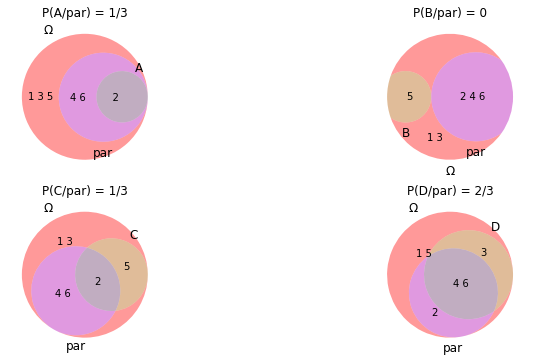

In [2]:
S = {1, 2, 3, 4, 5, 6}
A = {2}
B = {5}
C = A | B
D = {3, 4, 6}
par = {2,4,6}

plt.figure(figsize=(12,6))
plt.subplot(221) 
v = venn3([S, A, par], set_labels = ('$\Omega$', 'A', 'par'))
v.get_label_by_id('100').set_text('1 3 5')
v.get_label_by_id('101').set_text('4 6')
v.get_label_by_id('111').set_text('            2')
plt.title('P(A/par) = 1/3');

plt.subplot(222) 
v = venn3([S, B, par], set_labels = ('$\Omega$', 'B', 'par'))
v.get_label_by_id('100').set_text('\n\n\n\n\n\n\n1 3')
v.get_label_by_id('101').set_text('2 4 6')
v.get_label_by_id('110').set_text('5')
v.get_label_by_id('010').set_text('')
v.get_patch_by_id('010').set_color('white')
v.get_label_by_id('001').set_text('')
v.get_patch_by_id('001').set_color('white')
plt.title('P(B/par) = 0');

plt.subplot(223) 
v = venn3([S, C, par], set_labels = ('$\Omega$', 'C', 'par'))
v.get_label_by_id('100').set_text('1 3')
v.get_label_by_id('101').set_text('4 6')
v.get_label_by_id('110').set_text('5')
v.get_label_by_id('111').set_text('2')
#v.get_label_by_id('010').set_text('')
#v.get_patch_by_id('010').set_color('white')
#v.get_label_by_id('001').set_text('')
#v.get_patch_by_id('001').set_color('white')
plt.title('P(C/par) = 1/3');

plt.subplot(224) 
v = venn3([S, D, par], set_labels = ('$\Omega$', 'D', 'par'))
v.get_label_by_id('100').set_text('1 5')
v.get_label_by_id('101').set_text('2')
v.get_label_by_id('110').set_text('3')
v.get_label_by_id('111').set_text('4 6')
#v.get_label_by_id('010').set_text('')
#v.get_patch_by_id('010').set_color('white')
#v.get_label_by_id('001').set_text('')
#v.get_patch_by_id('001').set_color('white')
plt.title('P(D/par) = 2/3');

## Independencia de sucesos

Dos sucesos $A$ y $B$ son independientes cuando que uno de ellos acontezca no tiene ningún efecto en que lo haga o lo deje de hacer el otro. En tal caso:

$$P(A/B) =\frac{P(A\cap B)}{P(B)}= P(A) \quad \text{y} \quad P(B/A)=\frac{P(B\cap A)}{P(A)}=P(B)$$

y, consecuentemente, $P(A\cap B) = P(A)P(B)$ que suele tomarse también como definición de independencia.

Es muy importante **no confundir sucesos independientes y sucesos incompatibles**. Recordemos que éstos son sucesos disjuntos, esto es, su intersección es nula y, por tanto, no pueden acontecer simultáneamente. Por tanto, si uno sucede sabemos que el otro no puede suceder. Ello es radicalmente diferente de la independencia, que significa que si un suceso sucede no sabemos nada de qué va a pasar con el otro.

Consideremos de nuevo el experimento de probabilidad correspondiente al lanzamiento de un dado bueno.

Los sucesos $par$ e $impar$ son disjuntos $\left(A \cap B = \emptyset \right)$ y, por ello, incompatibles. Si el resutado es par, ciertamente sabemos que no puede haber salido impar. Igualmente sucede con los sucesos $div3$ (divisible por 3) y $nodiv3$ (no divisible por 3) y, en general, con cualquier conjunto de sucesos disjuntos.

Pero, supongamos ahora que sabemos que el resultado ha sido par. ¿Afecta ello a que el resultado haya sido no divisible por 3? Si no lo hace, los sucesos $par$ y $nodiv3$ son independientes. Veámoslo...

Es evidente que:
* $par \cap nodiv3 = \{2,4\} \implies P(par \cap nodiv3)=\frac{2}{6}=\frac{1}{3}$ 
* $P(nodiv3)=P(\{1,2,4,5\})=\frac{4}{6}=\frac{2}{3}$ 

Por tanto:

* $P(nodiv3 / par) =\frac{P(par \cap nodiv3)}{P(par)}=\frac{\frac{2}{6}}{\frac{3}{6}}=\frac{2}{3}$
* $P(nodiv3)P(par)=\frac{2}{3}\frac{1}{2}=\frac{1}{3}$

Vemos que, como dice la intuición si se reflexiona sobre ello, $nodiv3$ y $par$ son independientes, ya que:
* $P(nodiv3 / par) = P(nodiv3)=\frac{2}{3}$
* $P(par \cap nodiv3)=P(nodiv3)P(par)=\frac{1}{3}$

## Verosimilitud

La **verosimilitud** (*likelihood*) corresponde a la probabilidad condicionada, dejándose variar el suceso condicionante. Si se satisface el suceso $A$, la verosimilitud evalúa cuanto varía la probabilidad condicionada de dicha observación con los sucesos condicionantes $B_i$, $i \in \mathbb{N}$:

$$L(B_i)\equiv P(A/B_i)\qquad i \in \mathbb{N}$$

A la vista del suceso $A$ el principio de **"máxima verosimilitud"** (*maximum likelihood*) o **ML** considera que el el suceso condicionante **más verosímil** para la observacion es el que hace máxima la verosimilitud $L(B_i)$:

$$B_i \quad / \quad máx(L(A/B_i)) \quad \forall i \in \mathbb{N}$$

Un sencillo ejemplo muestra que el principio de máxima verosimilitud corresponde al *sentido común*. Consideremos un dado, dos posibles sucesos condicionantes, $div3$ y $nodiv3$, y un suceso correspondiente a una observación $A=\{1,2,4,6\}$. 

Si observamos el suceso $A$, esto es, si sabemos que ha salido $1$ ó $2$ ó $6$ nos preguntamos si es **más versosímil** que el lanzamiento haya dado un resultado divisible por tres ($div3$) o no divisible por tres ($nodiv3$).

Adviértase que **no nos preguntamos si es más probable** que el lanzamiento haya sido $div3$ o $nodiv3$, pues ello supondría conocer $P(div3/A)$ y $P(nodiv3/A)$, **sino más verosímil**, esto es, conociendo $P(A/div3)$ y $P(A/nodiv3)$.

En estos momentos **la distinción entre más probable y más verosímil puede resultar artificiosa**, pues estamos utilizando ejemplos muy sencillos. Sin embargo, con frecuencia, conocemos la probabilidad condicionada en un sentido y no en el opuesto. Es más, **los sucesos condicionantes los estamos considerando aleatorios. Sin embargo esto no es estrictamente necesario, con lo que podría ni siquiera tener sentido la búsqueda de las probabilidades de tales sucesos condicionantes**. 

Calculemos la verosimilitud, considerando el dado bueno:

$$L(div3)\equiv P(A/div3)=\frac{P(\{1,2,4,6\}\cap\{3,6\})}{P(\{3,6\})}=\frac{^1/_6}{^1/_3}=\frac{1}{2}\\
L(nodiv3)\equiv P(A/nodiv3)=\frac{P(\{1,2,4,6\}\cap\{1,2,4,5\})}{P(\{1,2,4,5\})}=\frac{^1/_2}{^2/_3}=\frac{3}{4}$$

Tal y como era fácil intuir, es más verosímil que el resultado no sea divisible por tres, ya que $A$ se satisface con tres de cuatro sucesos elementales (todos menos el $6$), mientras que si fuera divisible por tres, $A$ tan solo se satisface en uno de dos (el $6$).

Adviértase que **la verosimilitud NO es una probabilidad**, como queda puesto de manifiesto sin más que ver que $P(A/div3)+P(A/nodiv3) > 1$. Casualmente podría sumar uno (prúebese, por ejemplo, para $A=\{1,2,6\}$), pero seguiría sin ser una probabilidad.

# I.4 Teorema de la Probabilidad Total. Teorema de Bayes 

## Teorema de la Probabilidad Total

Consideremos una partición $\mathscr{P}$ del espacio muestral $\Omega$, constituida por $K$ sucesos disjuntos $B_i$:

$$B_i \in \mathscr{P}(\Omega) \, i=1\ldots K \iff  \begin{matrix}
  \bigcup_{i=1}^K B_i = \Omega &  \\
  B_i \cap B_j = \emptyset & i\neq j  
 \end{matrix}$$

Consideremos ahora un suceso $A \in \Omega$. Es fácil ver que:

$$\begin{align*}
P(A) &= P(A \cap B_1) + P(A \cap B_2) + \ldots  P(A \cap B_K)\\
     &= P(A/B_1)P(B_1) + P(A/B_2)P(B_2)+ \ldots P(A/B_K)P(B_K)\\
     &= \sum_{i=1}^K P(A/B_i)P(B_i)
\end{align*}$$

Apliquemos el **Teorema de la Probabilidad Total** al experimento de lanzar un dado bueno, sin trucar, para calcular las probabilidades de los sucesos vistos antes,  $A =\{2\}, \, B=\{5\}, \, C=A\cup B =\{2, 5\}, \, D=\{3, 4, 6\}$, considerando la partición en los sucesos $par$ e $impar$. **La partición la determina el problema**. Podríamos utilizar otras, por ejemplo $divisible por 3$ y $no divisible por 3$, y los resultados no variarían.

$$\begin{align*}
P(A) &= P(A/par)P(par)+P(A/impar)P(impar)=\frac{1}{3}\frac{1}{2}+0\frac{1}{2}=\frac{1}{6}\\
P(B) &= P(B/par)P(par)+P(B/impar)P(impar)=0\frac{1}{2}+\frac{1}{3}\frac{1}{2}=\frac{1}{6}\\
P(C) &= P(C/par)P(par)+P(C/impar)P(impar)=\frac{1}{3}\frac{1}{2}+\frac{1}{3}\frac{1}{2}=\frac{1}{3}\\
P(D) &= P(D/par)P(par)+P(D/impar)P(impar)=\frac{2}{3}\frac{1}{2}+\frac{1}{3}\frac{1}{2}=\frac{1}{2}
\end{align*}$$

Como ejemplo adicional, apliquemos ahora el **Teorema de la Probabilidad Total** al cálculo de la probabilidad del suceso $A=\{1,2,4,6\}$ a partir de las probabilidades de transición o verosimilitudes, vistas antes, y considerando las probabilidades a *priori*:
* Probabilidades de transición o verosimilitudes
  * $L(div3)\equiv P(A/div3)=\frac{1}{2}$
  * $L(nodiv3)\equiv P(A/nodiv3)=\frac{3}{4}$
* Probabilidades *a priori*
  * $P(div3) = \frac{1}{3}$
  * $P(nodiv3) = \frac{2}{3}$
  
$$P(A) = P(A/div3)P(div3)+P(A/nodiv3)P(nodiv3)= \frac{1}{2}\frac{1}{3}+\frac{3}{4}\frac{2}{3}=\frac{2}{3}$$

## Teorema de Bayes

Recordemos que la **probabilidad del suceso $A$ condicionada por el suceso $B$** es

$$P(A/B) = \frac{P(A\cap B)}{P(B)}$$

La interpretación es que, si ambos sucesos $A$ y $B$ no son independientes, que acontezca $B$ supone una información adicional en relación a la certidumbre de $A$, cuya probabilidad $P(A)$ pasa ahora a ser $P(A/B)$.

Supongamos que conocemos $P(A/B)$ y que acontece el suceso $A$. Nos preguntamos cuál es la $P(B/A)$. **Adviértase la diferencia con la verosimilitud** $L(B)= P(A/B)$.

El **Teorema de Bayes** nos permite dar una respuesta:

$$P(B/A) = \frac{P(B\cap A)}{P(A)}=\frac{P(A/B)P(B)}{P(A)}$$

* El suceso $A$ es la observación
  * Su probabilidad condicionada, también llamada **probabilidad de transición**, es $P(A/B)$, y suele ser un dato del problema.
  * Su probabilidad total es $P(A)$, y suele requerir del Teorema de la Probabilidad Total para ser calculada.
* El suceso $B$ es el suceso condicionante
  * Su probabilidad total es $P(B)$, también llamada **probabilidad *a priori***, y suele conocerse de antemano.
  * Su probabilidad condicionada por la observación, $P(B/A)$, también denominada **probabilidad *a posteriori*** se calcula mediante el Teorema de Bayes.

Apliquemos el **Teorema de Bayes** para calcular $P(par)$ cuando acontecen los sucesos $A =\{2\}, \, B=\{5\}, \, C=A\cup B =\{2, 5\}, \, D=\{3, 4, 6\}$. La **probabilidad *a priori*** del dado bueno es $P(par)=P(impar)=1/2$. Las **probabilidades *a posteriori*** son:

$$\begin{align*}
P(par/A) &=\frac{P(A/par)P(par)}{P(A)} =\frac{(1/3)(1/2)}{1/6}=1&\neq P(A/par)\\
P(par/B) &=\frac{P(B/par)P(par)}{P(B)} =\frac{0(1/2)}{1/2}=0 &=P(B/par)\\
P(par/C) &=\frac{P(C/par)P(par)}{P(C)} =\frac{(1/3)(1/2)}{1/3}=\frac{1}{2}&\neq P(C/par)\\
P(par/D) &=\frac{P(D/par)P(par)}{P(D)} =\frac{(2/3)(1/2)}{1/2}=\frac{2}{3}&=P(D/par)
\end{align*}$$

# I.5 Decisores ML y MAP

Supongamos ahora que se establece una partición sobre el espacio muestral $\Omega$, $B_i \in \mathscr{P}(\Omega) \, i=1\ldots K$. Consideremos que **acontence la observación** del suceso $A$, para el que conocemos las **probabilidades de transición** $P((A/B_i)$. 

Nos preguntamos qué suceso condicionante ha causado la observación:

* **Principio de Máxima Verosimilitud (ML)**: en ausencia de más información, elegimos el suceso $B_i$ maximiza la verosimilitud $L(B_i)=P(A/B_i)$.
* **Principio de Máximo *a Posteriori* (MAP)**: si, además de las probabilidades de transición, se conocen las probabilidades *a priori*, pueden calcularse las probabilidasdes *a posteri* con el Teorema de Bayes y el de la Probabilidad Total. En tal caso, elegimos el suceso $B_i$ que maximiza la probabilidad a posteriori.

Consideremos de nuevo el caso del lanzamiento de un dado, y que el suceso observado es el $A=\{1,2,4,5\}$. Si el dado no está trucado, ya hemos visto cuáles son las probabilidades de transición de la observación por que el lanzamiento sea divisible o no por tres, obteniéndose directamente las verosimilitudes de ambas posibilidades:

* $L(div3)\equiv P(A/div3)=\frac{1}{2}$
* $L(nodiv3)\equiv P(A/nodiv3)=\frac{3}{4}$

Como $L(nodiv3)>L(div3)$, el **principio de máxima verosimilitud (ML)** conduce a seleccionar el suceso $nodiv3$ como **causante más verosímil** de la observación. Adviértase que $L(nodiv3)+L(div3)\neq 1$.

Si conocemos las probabilidades *a priori*, $P(div3)=\ ^1/_3$ y $P(nodiv3)=\ ^2/_3$, ya hemos visto que el Teorema de la Probabilidad Total permite calcular $P(A)=\ ^2/_3$. Ahora **podemos calcular las probabilidades *a posteriori* haciendo uso del Teorema de Bayes**:

$$P(div3/A)=\frac{P(A/div3)P(div3)}{P(A)}= \frac{^1/_2 \ ^1/_3}{^2/_3}=\frac{1}{4}\\
P(nodiv3/A)=\frac{P(A/nodiv3)P(nodiv3)}{P(A)}= \frac{^3/_4 \ ^2/_3}{^2 /_3}=\frac{3}{4}$$

Como $P(nodiv3/A)>P(div3/A)$, el **principio de máximo *a posteriori* (MAP)** conduce a seleccionar el suceso $nodiv3$ como **causante más probable** de la observación. Adviértase que $P(nodiv3/A)+P(div3/A)=1$.

En el ejemplo que acabamos de ver, el decisor de máxima verosimilitud (MAP) y el de máximo a posteriori (ML) proporcionan dan lugar a la misma toma de decisión: seleccionar como causa el suceso no divisible por tres.

Sin embargo, es posible que ambos decisores den resultados diferentes. **El decisor MAP incorpora información *a priori*, de la que no dispone el decisor ML**, que puede resultar de suma utilidad. Veámoslo con un nuevo ejemplo:

Consideremos el lanzamiento del dado bueno, pero ahora la observación es el suceso $A=\{3,4,5\}$

Las verosimilitudes ahora resultan:

$$L(div3)\equiv P(A/div3)=\frac{P(\{3,4,5\}\cap\{3,6\})}{P(\{3,6\})}=\frac{^1/_6}{^1/_3}=\frac{1}{2}\\
L(nodiv3)\equiv P(A/nodiv3)=\frac{P(\{3,4,5\}\cap\{1,2,4,5\})}{P(\{1,2,4,5\})}=\frac{^1/_3}{^2/_3}=\frac{1}{2}$$

Dado que $L(div3)=L(nodiv3)$ el decisor ML no nos sirve. 


Si conocemos las probabilidades *a priori*, $P(div3)=\ ^1/_3$ y $P(nodiv3)=\ ^2/_3$, el Teorema de la Probabilidad Total permite calcular $P(A)$: 

$$P(A) = P(A/div3)P(div3)+P(A/nodiv3)P(nodiv3)= \frac{1}{2}\frac{1}{3}+\frac{1}{2}\frac{2}{3}=\frac{1}{2}$$

Y calculamos las probabilidades *a posteriori* con el Teorema de Bayes:

$$P(div3/A)=\frac{P(A/div3)P(div3)}{P(A)}= \frac{^1/_2 \ ^1/_3}{^1/_2}=\frac{1}{3}\\
P(nodiv3/A)=\frac{P(A/nodiv3)P(nodiv3)}{P(A)}= \frac{^1/_2 \ ^2/_3}{^1 /_2}=\frac{2}{3}$$

Resulta que $P(nodiv3/A) > P(div3/A)$, por lo que es más probable que la causa de la observación haya sido el suceso no divisible por tres.

¿Qué ha pasado?
* Si el suceso condicionante es divisible por tres, la observación $A$ se satisface la mitad de las veces, esto es, siempre que salga 3 (1 caso favorable de 2 posibles). Igualmente, si el suceso condicionante no es divisible por tres, la observación $A$ se satisface la mitad de las veces, esto es, siempre que salga 4 ó 5 (2 casos favorables de 4 posibles). Por tanto, **las verosimilitudes son idénticas**.

* Sin embargo, es más probable que resultado sea no divisible por tres (4 casos favorables de 6 posibles) a que sea divisible por tres (2 casos favorables de 6 posibles). **El decisor MAP considera las diferentes probabilidades *a priori*, ponderando aquellos resultados en que éstas son mayores. Ello lo realiza a través del Teorema de Bayes al multiplicar las verosimilitudes por las probabilidades *a priori***. La división por $P(A)$ es una normalización, para que resulte una probabilidad válida.

Por ello, si las probabilidades *a priori* son iguales, el decisor MAP no puede mejorar el resultado del ML. Pero si son distintas, aprovecha la información disponible *a priori*. Podemos por ello considerar que el decisor ML es un decisor MAP en el que no tenemos información *a priori*, situación que se modela asignando idénticas probabilidades *a priori* a todos los sucesos condicionantes.

## Ejemplos de cálculo computacional 

### Probabilidades condicionadas 

Veamos varios ejemplos, utilizando de nuevo un dado bueno y otro trucado, ambos de seis caras:

In [3]:
caras  = np.array([1,2,3,4,5,6])
P_dado = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])
P_dadoTrucado    = np.array([1/12, 1/12, 1/12, 1/12, 1/3, 1/3]).round(decimals=10)
P_dadoTrucado[5] = 1-P_dadoTrucado[0:5].sum()

elementos = ['uno','dos','tres','cuatro','cinco','seis']
uno, dos, tres, cuatro, cinco, seis = 0,1,2,3,4,5

S = np.array([[1,0,0,0,0,0],
              [0,1,0,0,0,0],
              [0,0,1,0,0,0],
              [0,0,0,1,0,0],
              [0,0,0,0,1,0],
              [0,0,0,0,0,1]])

sucesos = ['nulo','par','impar','div3','nodiv3','seguro']
nulo, par, impar, div3, nodiv3, seguro = 0,1,2,3,4,5

F = np.array([[0,0,0,0,0,0],
              [0,1,0,1,0,1],
              [1,0,1,0,1,0],
              [0,0,1,0,0,1],
              [1,1,0,1,1,0],
              [1,1,1,1,1,1]]);

P_suc        = np.zeros(6)
P_sucTrucado = np.zeros(6)
print('Probabilidades sucesos singulares:\n')
for i,suc in enumerate(sucesos):
    P_suc[i] = (F[i]*P_dado).sum().round(decimals=15)
    print('Probabilidad dado bueno(', F[i], suc, ') ->', P_suc[i])
    P_sucTrucado[i] = (F[i]*P_dadoTrucado).sum()
    print('Probabilidad dado trucado(', F[i], suc, ') ->', P_sucTrucado[i],'\n')

Probabilidades sucesos singulares:

Probabilidad dado bueno( [0 0 0 0 0 0] nulo ) -> 0.0
Probabilidad dado trucado( [0 0 0 0 0 0] nulo ) -> 0.0 

Probabilidad dado bueno( [0 1 0 1 0 1] par ) -> 0.5
Probabilidad dado trucado( [0 1 0 1 0 1] par ) -> 0.5000000001 

Probabilidad dado bueno( [1 0 1 0 1 0] impar ) -> 0.5
Probabilidad dado trucado( [1 0 1 0 1 0] impar ) -> 0.4999999999 

Probabilidad dado bueno( [0 0 1 0 0 1] div3 ) -> 0.333333333333333
Probabilidad dado trucado( [0 0 1 0 0 1] div3 ) -> 0.4166666668 

Probabilidad dado bueno( [1 1 0 1 1 0] nodiv3 ) -> 0.666666666666667
Probabilidad dado trucado( [1 1 0 1 1 0] nodiv3 ) -> 0.5833333332 

Probabilidad dado bueno( [1 1 1 1 1 1] seguro ) -> 1.0
Probabilidad dado trucado( [1 1 1 1 1 1] seguro ) -> 1.0 



**Probabilidad del suceso "uno" condicionado por el suceso "resultado par"**

In [4]:
parYuno      = np.logical_and(F[par], S[uno]).astype(int);
P_parYuno    = (parYuno*P_dado).sum()
P_unoCONDpar = P_parYuno/P_suc[par]

print('\nSuceso que salga par INTERSECCIÓN que salga uno', 
     parYuno, 
     '\n\tProbabilidad INTERSECCIÓN:', P_parYuno,
     '\n\tProbabilidad de que salga par:', P_suc[par],
     '\nP(uno / par) = ', P_unoCONDpar)


Suceso que salga par INTERSECCIÓN que salga uno [0 0 0 0 0 0] 
	Probabilidad INTERSECCIÓN: 0.0 
	Probabilidad de que salga par: 0.5 
P(uno / par) =  0.0


* **Probabilidad del suceso "uno" condicionado por el suceso "resultado impar"**

In [5]:
imparYuno      = np.logical_and(F[impar], S[uno]).astype(int);
P_imparYuno    = (imparYuno*P_dado).sum().round(decimals=15)
P_unoCONDimpar = P_imparYuno/P_suc[impar]

print('\nSuceso que salga impar INTERSECCIÓN que salga uno', 
     imparYuno, 
     '\n\tProbabilidad INTERSECCIÓN:', P_imparYuno,
     '\n\tProbabilidad de que salga impar:', P_suc[impar],
     '\nP(uno / impar) = ', P_unoCONDimpar)


Suceso que salga impar INTERSECCIÓN que salga uno [1 0 0 0 0 0] 
	Probabilidad INTERSECCIÓN: 0.166666666666667 
	Probabilidad de que salga impar: 0.5 
P(uno / impar) =  0.333333333333334


* **Probabilidad del suceso "tres o cuatro o cinco" condicionado por el suceso "resultado par"**

In [6]:
tres_cuatro_cinco = np.array([0,0,1,1,1,0]);
P_tres_cuatro_cinco = (tres_cuatro_cinco*P_dado).sum().round(decimals=15)

parOtres_cuatro_cinco   = np.logical_or(F[par], tres_cuatro_cinco).astype(int)
P_parOtres_cuatro_cinco = (parOtres_cuatro_cinco*P_dado).sum().round(decimals=15)

parYtres_cuatro_cinco   = np.logical_and(F[par], tres_cuatro_cinco).astype(int)
P_parYtres_cuatro_cinco = (parYtres_cuatro_cinco*P_dado).sum().round(decimals=15)

In [7]:
P_tres_cuatro_cincoCONDpar = P_parYtres_cuatro_cinco/P_suc[par]
print('\nSuceso que salga par INTERSECCIÓN que salga tres o cuatro o cinco', 
     parYtres_cuatro_cinco, 
     '\n\tProbabilidad INTERSECCIÓN:', P_parYtres_cuatro_cinco,
     '\n\tProbabilidad de que salga par:', P_suc[par],
     '\nP(tres o cuatro o cinco / par) = ', P_tres_cuatro_cincoCONDpar)


Suceso que salga par INTERSECCIÓN que salga tres o cuatro o cinco [0 0 0 1 0 0] 
	Probabilidad INTERSECCIÓN: 0.166666666666667 
	Probabilidad de que salga par: 0.5 
P(tres o cuatro o cinco / par) =  0.333333333333334


* **Probabilidad del suceso "tres o cuatro o cinco" condicionado por el suceso "resultado impar"**

In [8]:
imparOtres_cuatro_cinco   = np.logical_or(F[impar], tres_cuatro_cinco).astype(int)
P_imparOtres_cuatro_cinco = (imparOtres_cuatro_cinco*P_dado).sum()

imparYtres_cuatro_cinco   = np.logical_and(F[impar], tres_cuatro_cinco).astype(int)
P_imparYtres_cuatro_cinco = (imparYtres_cuatro_cinco*P_dado).sum()

In [9]:
P_tres_cuatro_cincoCONDimpar = P_imparYtres_cuatro_cinco/P_suc[impar]
print('\nSuceso que salga impar INTERSECCIÓN que salga tres o cuatro o cinco', 
     imparYtres_cuatro_cinco, 
     '\n\tProbabilidad INTERSECCIÓN:', P_imparYtres_cuatro_cinco,
     '\n\tProbabilidad de que salga impar:', P_suc[impar],
     '\nP(tres o cuatro o cinco / impar) = ', P_tres_cuatro_cincoCONDimpar)


Suceso que salga impar INTERSECCIÓN que salga tres o cuatro o cinco [0 0 1 0 1 0] 
	Probabilidad INTERSECCIÓN: 0.3333333333333333 
	Probabilidad de que salga impar: 0.5 
P(tres o cuatro o cinco / impar) =  0.6666666666666666


* **Probabilidad del suceso "tres o cuatro o cinco" condicionado por el suceso "resultado divisible por tres"**

In [10]:
div3Otres_cuatro_cinco   = np.logical_or(F[div3], tres_cuatro_cinco).astype(int)
P_div3Otres_cuatro_cinco = (div3Otres_cuatro_cinco*P_dado).sum().round(decimals=15)

div3Ytres_cuatro_cinco   = np.logical_and(F[div3], tres_cuatro_cinco).astype(int)
P_div3Ytres_cuatro_cinco = (div3Ytres_cuatro_cinco*P_dado).sum().round(decimals=15)

In [11]:
P_tres_cuatro_cincoCONDdiv3 = P_div3Ytres_cuatro_cinco/P_suc[div3]
print('\nSuceso divisible por tres INTERSECCIÓN que salga tres o cuatro o cinco', 
     div3Ytres_cuatro_cinco, 
     '\n\tProbabilidad INTERSECCIÓN:', P_div3Ytres_cuatro_cinco,
     '\n\tProbabilidad divisible por tres:', P_suc[div3],
     '\nP(tres o cuatro o cinco / divisible por tres) = ',
     P_tres_cuatro_cincoCONDdiv3)


Suceso divisible por tres INTERSECCIÓN que salga tres o cuatro o cinco [0 0 1 0 0 0] 
	Probabilidad INTERSECCIÓN: 0.166666666666667 
	Probabilidad divisible por tres: 0.333333333333333 
P(tres o cuatro o cinco / divisible por tres) =  0.5000000000000016


* **Probabilidad del suceso "tres o cuatro o cinco" condicionado por el suceso "resultado no divisible por tres"**

In [12]:
nodiv3Otres_cuatro_cinco   = np.logical_or(F[nodiv3], tres_cuatro_cinco).astype(int)
P_nodiv3Otres_cuatro_cinco = (nodiv3Otres_cuatro_cinco*P_dado).sum()

nodiv3Ytres_cuatro_cinco   = np.logical_and(F[nodiv3], tres_cuatro_cinco).astype(int)
P_nodiv3Ytres_cuatro_cinco = (nodiv3Ytres_cuatro_cinco*P_dado).sum()

In [13]:
P_tres_cuatro_cincoCONDnodiv3 = P_nodiv3Ytres_cuatro_cinco/P_suc[nodiv3]
print('\nSuceso no divisible por tres INTERSECCIÓN que salga tres o cuatro o cinco', 
     nodiv3Ytres_cuatro_cinco, 
     '\n\tProbabilidad INTERSECCIÓN:', P_nodiv3Ytres_cuatro_cinco,
     '\n\tProbabilidad no divisible por tres:', P_suc[nodiv3],
     '\nP(tres o cuatro o cinco / no divisible por tres) = ',
     P_tres_cuatro_cincoCONDnodiv3)


Suceso no divisible por tres INTERSECCIÓN que salga tres o cuatro o cinco [0 0 0 1 1 0] 
	Probabilidad INTERSECCIÓN: 0.3333333333333333 
	Probabilidad no divisible por tres: 0.666666666666667 
P(tres o cuatro o cinco / no divisible por tres) =  0.4999999999999998


### Ejemplos de Verosimilitud

Supongamos que se realiza el experimento lanzar un dado, y tan sólo nos dicen que ha salido "tres o cuatro o cinco". A la vista de tal resultado, nos preguntan si el número que realmente ha salido es par, impar, divisible por tres o no divisible por tres.

* Par - Impar es una partición del espacio muestral, pues son sucesos mutuamente excluyentes cuya unión proporciona el suceso seguro. Como vemos, es más verosímil que haya salido impar que par.

In [14]:
print('P(tres o cuatro o cinco / par) = ',  P_tres_cuatro_cincoCONDpar)
print('P(tres o cuatro o cinco / impar) = ',  P_tres_cuatro_cincoCONDimpar)

P(tres o cuatro o cinco / par) =  0.333333333333334
P(tres o cuatro o cinco / impar) =  0.6666666666666666


* Divisible por tres - No divisible por tres es también una partición del espacio muestral. Como vemos, es igualmente verosímil que haya salido divisible por tres que no divisible por tres.

In [15]:
print('P(tres o cuatro o cinco / divisible por tres) = ',  
      P_tres_cuatro_cincoCONDdiv3)
print('P(tres o cuatro o cinco / no divisible por tres) = ',
      P_tres_cuatro_cincoCONDnodiv3)

P(tres o cuatro o cinco / divisible por tres) =  0.5000000000000016
P(tres o cuatro o cinco / no divisible por tres) =  0.4999999999999998


### Ejemplos del teorema de la probabilidad total

In [16]:
print('Probabilidad de que salga tres o cuatro o cinco:', P_tres_cuatro_cinco,
      '\nP(tres o cuatro o cinco / par:) ', P_tres_cuatro_cincoCONDpar,
     '\n\tProbabilidad de que salga par:', P_suc[par],
     '\nP(tres o cuatro o cinco / impar) = ', P_tres_cuatro_cincoCONDimpar,
     '\n\tProbabilidad de que salga impar:', P_suc[impar],
     '\nProbabilidad total tres o cuatro o cinco:',
      P_tres_cuatro_cincoCONDpar*P_suc[par]+
      P_tres_cuatro_cincoCONDimpar*P_suc[impar])

Probabilidad de que salga tres o cuatro o cinco: 0.5 
P(tres o cuatro o cinco / par:)  0.333333333333334 
	Probabilidad de que salga par: 0.5 
P(tres o cuatro o cinco / impar) =  0.6666666666666666 
	Probabilidad de que salga impar: 0.5 
Probabilidad total tres o cuatro o cinco: 0.5000000000000003


In [17]:
print('Probabilidad de que salga tres o cuatro o cinco:', P_tres_cuatro_cinco,
      '\nP(tres o cuatro o cinco / divisible por tres:) ',
     P_tres_cuatro_cincoCONDdiv3,
     '\n\tProbabilidad de que salga divisible por tres:', P_suc[div3],
     '\nP(tres o cuatro o cinco / no divisible por tres) = ',
      P_tres_cuatro_cincoCONDnodiv3,
     '\n\tProbabilidad de que salga no divisible por tres:', P_suc[nodiv3],
     '\nProbabilidad total tres o cuatro o cinco:',
      P_tres_cuatro_cincoCONDdiv3*P_suc[div3]+
      P_tres_cuatro_cincoCONDnodiv3*P_suc[nodiv3])

Probabilidad de que salga tres o cuatro o cinco: 0.5 
P(tres o cuatro o cinco / divisible por tres:)  0.5000000000000016 
	Probabilidad de que salga divisible por tres: 0.333333333333333 
P(tres o cuatro o cinco / no divisible por tres) =  0.4999999999999998 
	Probabilidad de que salga no divisible por tres: 0.666666666666667 
Probabilidad total tres o cuatro o cinco: 0.5000000000000003


### Ejemplos del Teorema de Bayes

Veamos varios casos:

**El resultado observado es tres, cuatro o cinco. ¿Será par o impar el resultado?**

* Probabilidad del resultado par condicionado por que haya salido tres, cuatro o cinco

In [18]:
P_parCONDtres_cuatro_cinco = P_tres_cuatro_cincoCONDpar*P_suc[par]/P_tres_cuatro_cinco
print('P(par / tres_cuatro_cinco)', P_parCONDtres_cuatro_cinco)

P(par / tres_cuatro_cinco) 0.333333333333334


* Probabilidad del resultado impar condicionado por que haya salido tres, cuatro o cinco

In [19]:
P_imparCONDtres_cuatro_cinco = P_tres_cuatro_cincoCONDimpar*P_suc[impar]/P_tres_cuatro_cinco
print('P(impar / tres_cuatro_cinco)', P_imparCONDtres_cuatro_cinco)

P(impar / tres_cuatro_cinco) 0.6666666666666666


La probabilidad a posteriori de que salga impar es superior a que salga par, si el resultado visto es tres, cuatro o cinco.

Como las probabilidades a priori son iguales, la decisión MAP coincide con la ML.

**El resultado observado es tres, cuatro o cinco. ¿Será divisible por tres o no el resultado?**

* Probabilidad del resultado divisible por tres condicionado por que haya salido tres, cuatro o cinco

In [20]:
P_div3CONDtres_cuatro_cinco = P_tres_cuatro_cincoCONDdiv3*P_suc[div3]/P_tres_cuatro_cinco
print('P(divisible por tres / tres_cuatro_cinco)', P_div3CONDtres_cuatro_cinco)

P(divisible por tres / tres_cuatro_cinco) 0.33333333333333404


* Probabilidad del resultado no divisible por tres condicionado por que haya salido tres, cuatro o cinco

In [21]:
P_nodiv3CONDtres_cuatro_cinco = P_tres_cuatro_cincoCONDnodiv3*P_suc[nodiv3]/P_tres_cuatro_cinco
print('P(no divisible por tres / tres_cuatro_cinco)', P_nodiv3CONDtres_cuatro_cinco)

P(no divisible por tres / tres_cuatro_cinco) 0.6666666666666666


La probabilidad a posteriori de que no sea divisible por tres es superior a que sí lo sea. El decisor MAP permite tomar una decisión cuando el ML no permitía discriminar, gracias a que las probabilidades a priori son diferentes.

Consideremos una variante del problema que nos muestra fácilmente que **los sucesos condicionantes no tienen por qué tener una caracterización probabilística**. Ello, sin embargo, implica sustituir el concepto de probabilidad condicionada por una probabilidad parametrizada. Con frecuencia, aunque podamos pensar en términos probabilísticos, no conocemos las probabilidades de los sucesos condicionantes.

Supongamos que tenemos un tetredro regular, a cuyas cuatro caras se les asignan los números $1, 2, 4, 5$ y una moneda, a cuyas dos caras se le asignan los números $3$ y $6$. El suceso $div3$ equivale a coger el tetraedro, mientras que el suceso $nodiv3$ equivale a coger la moneda. Construyamos un espacio de probabilidad forzando que el resultado de cada número tenga idéntica probabilidad al del experimento del dado, tanto si es bueno como trucado. En tal caso, podemos desconocer qué probabilidad tenemos **a priori** coger el tetraedro o la moneda. Sólo conocemos cuáles son las probabilidades de cada resultado si cogemos el tetredro, así como las probabilidades de cada resutado si cogemos la moneda.

Ciertamente, en un caso tan sencillo podemos estimar unas probabilidades de coger el tetraedro o la moneda si, por ejemplo, forzamos que todos los resultados sean equiprobables: la probabilidad de coger el tetraedro es de $²/_3$ y de coger la moneda es de $¹/_3$, pero en experimentos más complicados puede resultar imposible de conocer.